In [1]:
import json
from utils.OpenMeteoWeather import OpenMeteoWeather
from utils.Copernicus import AdvancedCopernicus
from utils.PlanetPositions import PlanetPositions
import pandas as pd




In [15]:
output_filename = "output.nc"
start_datetime = "2023-09-01T00:00:00Z"
end_datetime = "2025-02-01T00:00:00Z"

latitude = 54.3323
longitude = 10.1519
val_range = 0.5

minimum_latitude = latitude - val_range
maximum_latitude = latitude + val_range
minimum_longitude = longitude - val_range
maximum_longitude = longitude + val_range



ac = AdvancedCopernicus()

ac_data = ac.get_subset(
                dataset_id="cmems_mod_glo_phy_anfc_0.083deg_PT1H-m",
                dataset_version="202406",
                variables=["so", "thetao", "vo", "zos", "uo"], 
                minimum_longitude=minimum_longitude,
                maximum_longitude=maximum_longitude,
                minimum_latitude=minimum_latitude,
                maximum_latitude=maximum_latitude,
                start_datetime=start_datetime,
                end_datetime=end_datetime,
                minimum_depth=0.49402499198913574,
                maximum_depth=0.49402499198913574,
                coordinates_selection_method="strict-inside",
                disable_progress_bar=False,
                output_filename=output_filename
                )
ac.delete_dataset(output_filename)

# convert datetime to YYYY-MM-DD
start_datetime = start_datetime.split("T")[0]
end_datetime = end_datetime.split("T")[0]



omw = OpenMeteoWeather(latitude=latitude, 
                       longitude=longitude, 
                       start_date=start_datetime, 
                       end_date=end_datetime)
df_omw = omw.get_weather_dataframe(archive=True)




INFO - 2025-02-15T12:12:14Z - Selected dataset version: "202406"
INFO - 2025-02-15T12:12:14Z - Selected dataset part: "default"
INFO - 2025-02-15T12:12:19Z - Starting download. Please wait...


  0%|          | 0/40 [00:00<?, ?it/s]

INFO - 2025-02-15T12:12:29Z - Successfully downloaded to output.nc


In [23]:
# dataset_id="cmems_mod_bal_wav_anfc_PT1H-i",
#   dataset_version="202311",
#   variables=["VCMX", "VHM0", "VHM0_SW1", "VHM0_SW2", "VHM0_WW", "VMDR", "VMDR_SW1", "VMDR_SW2", "VMDR_WW", "VMXL", "VPED", "VSDX", "VSDY", "VTM01_SW1", "VTM01_SW2", "VTM01_WW", "VTM02", "VTM10", "VTPK"],
#   minimum_longitude=9.013887405395508,
#   maximum_longitude=30.207738876342773,
#   minimum_latitude=53.0082893371582,
#   maximum_latitude=65.90777587890625,
#   start_datetime="2025-02-21T00:00:00",
#   end_datetime="2025-02-21T00:00:00",


ac_balticwave = ac.get_subset(
                dataset_id="cmems_mod_bal_wav_anfc_PT1H-i",
                dataset_version="202311",
                variables=["VCMX", "VHM0", "VHM0_SW1", "VHM0_SW2", "VHM0_WW", "VMDR", "VMDR_SW1", "VMDR_SW2", "VMDR_WW", "VMXL", "VPED", "VSDX", "VSDY", "VTM01_SW1", "VTM01_SW2", "VTM01_WW", "VTM02", "VTM10", "VTPK"], 
                minimum_longitude=minimum_longitude,
                maximum_longitude=maximum_longitude,
                minimum_latitude=minimum_latitude,
                maximum_latitude=maximum_latitude,
                start_datetime=start_datetime,
                end_datetime=end_datetime,
                minimum_depth=0.49402499198913574,
                maximum_depth=0.49402499198913574,
                coordinates_selection_method="strict-inside",
                disable_progress_bar=False,
                output_filename=output_filename
                ) 
ac.delete_dataset(output_filename)

INFO - 2025-02-15T12:35:01Z - Selected dataset version: "202311"
INFO - 2025-02-15T12:35:01Z - Selected dataset part: "default"
INFO - 2025-02-15T12:35:08Z - Starting download. Please wait...


  0%|          | 0/1824 [00:00<?, ?it/s]

INFO - 2025-02-15T12:44:54Z - Successfully downloaded to output.nc


In [32]:
df_balticwave = ac_balticwave.to_dataframe().reset_index()
df_balticwave = df_balticwave.dropna(axis=0, how='any')
df_balticwave['time'] = df_balticwave['time'].dt.strftime('%Y-%m-%d %H:%M:%S')


df_balticwave_grouped = df_balticwave.groupby('time').mean().reset_index()
display(df_balticwave_grouped.head())


# Sea surface wave maximum heightVCMX [m]

# Sea surface wave significant heightVHM0 [m]

# Sea surface primary swell wave significant heightVHM0_SW1 [m]

# Sea surface secondary swell wave significant heightVHM0_SW2 [m]

# Sea surface wind wave significant heightVHM0_WW [m]

# Sea surface wave from directionVMDR [°]

# Sea surface primary swell wave from directionVMDR_SW1 [°]

# Sea surface secondary swell wave from directionVMDR_SW2 [°]

# Sea surface wind wave from directionVMDR_WW [°]

# Sea surface wave maximum crest heightVMXL [m]

# Sea surface wave from direction at variance spectral density maximumVPED [°]

# Sea surface wave stokes drift x velocityVSDX [m/s]

# Sea surface wave stokes drift y velocityVSDY [m/s]

# Sea surface primary swell wave mean periodVTM01_SW1 [s]

# Sea surface secondary swell wave mean periodVTM01_SW2 [s]

# Sea surface wind wave mean periodVTM01_WW [s]

# Sea surface wave mean period from variance spectral density second frequency momentVTM02 [s]

# Sea surface wave mean period from variance spectral density inverse frequency momentVTM10 [s]

# Sea surface wave period at variance spectral density maximumVTPK [s]
df_balticwave_grouped.columns


time   latitude  longitude      VCMX      VHM0  VHM0_SW1  \
0  2023-09-01 00:00:00  54.630947  10.300039  0.761569  0.455918  0.053588   
1  2023-09-01 01:00:00  54.630947  10.300039  0.732432  0.438287  0.071036   
2  2023-09-01 02:00:00  54.630947  10.300039  0.687864  0.411555  0.067508   
3  2023-09-01 03:00:00  54.630947  10.300039  0.637229  0.381275  0.066574   
4  2023-09-01 04:00:00  54.630947  10.300039  0.611761  0.365523  0.063498   

   VHM0_SW2   VHM0_WW        VMDR    VMDR_SW1  ...      VMXL        VPED  \
0  0.007101  0.449909  247.269745  175.830948  ...  0.459935  245.759720   
1  0.007583  0.427328  251.979797  170.600159  ...  0.440634  250.695068   
2  0.012596  0.400729  255.496475  178.632462  ...  0.412690  255.700821   
3  0.012211  0.370143  258.471405  177.381622  ...  0.381447  258.426666   
4  0.009296  0.353532  262.633972  170.293030  ...  0.365896  262.861237   

       VSDX      VSDY  VTM01_SW1  VTM01_SW2  VTM01_WW     VTM02     VTM10  \
0  0.089504  0.029989   2.385271   3.958814  2.077965  1.911072  2.348001   
1  0.084419  0.019815   2.277322   3.532811  2.063813  1.907472  2.342495   
2  0.078972  0.014185   2.255683   3.493172  2.026574  1.879017  2.309280   
3  0.073130  0.008835   2.160603   3.553391  1.965092  1.835640  2.259277   
4  0.074476  0.006845   2.216522   3.600103  1.908154  1.788287  2.199355   

       VTPK  
0  2.731437  
1  2.729690  
2  2.718224  
3  2.654862  
4  2.574745  

[5 rows x 22 columns]

Index(['time', 'latitude', 'longitude', 'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2',
       'VHM0_WW', 'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW', 'VMXL', 'VPED',
       'VSDX', 'VSDY', 'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW', 'VTM02', 'VTM10',
       'VTPK'],
      dtype='object')

In [33]:
pp = PlanetPositions(start_date=start_datetime, stop_date=end_datetime, step='1h')
pp.fetch_data()
pp.convert_time()
df_planet = pp.get_dataframe()

# convert colum datetime to YYYY-MM-DD HH:MM:SS
df_planet['datetime'] = df_planet['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
display(df_planet.head())




targetname                    datetime_str         x         y  \
0  Mercury (199)  A.D. 2023-Sep-01 00:00:00.0000 -0.618379  0.128287   
1  Mercury (199)  A.D. 2023-Sep-01 01:00:00.0000 -0.618143  0.128602   
2  Mercury (199)  A.D. 2023-Sep-01 02:00:00.0000 -0.617909  0.128918   
3  Mercury (199)  A.D. 2023-Sep-01 03:00:00.0000 -0.617677  0.129237   
4  Mercury (199)  A.D. 2023-Sep-01 04:00:00.0000 -0.617447  0.129557   

          z        vx        vy        vz  lighttime     range  range_rate  \
0 -0.049557  0.005684  0.007540  0.000829   0.003659  0.633487   -0.004086   
1 -0.049522  0.005637  0.007581  0.000838   0.003658  0.633318   -0.004028   
2 -0.049487  0.005590  0.007622  0.000847   0.003657  0.633151   -0.003970   
3 -0.049452  0.005543  0.007663  0.000856   0.003656  0.632987   -0.003911   
4 -0.049416  0.005495  0.007704  0.000865   0.003655  0.632825   -0.003852   

    planet             datetime  
0  Mercury  2023-09-01 02:00:00  
1  Mercury  2023-09-01 03:00:00  
2  Mercury  2023-09-01 03:59:59  
3  Mercury  2023-09-01 05:00:00  
4  Mercury  2023-09-01 06:00:00

In [34]:
df_planet.planet.unique()

array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus',
       'Neptune', 'Moon'], dtype=object)

In [35]:
# just select planet moon
df_planet = df_planet[df_planet['planet'] == 'Moon']
#df_planet = pd.get_dummies(df_planet, columns=['planet'])
display(df_planet.head())

targetname                    datetime_str         x         y  \
99656  Moon (301)  A.D. 2023-Sep-01 00:00:00.0000  0.002368 -0.000364   
99657  Moon (301)  A.D. 2023-Sep-01 01:00:00.0000  0.002373 -0.000338   
99658  Moon (301)  A.D. 2023-Sep-01 02:00:00.0000  0.002377 -0.000312   
99659  Moon (301)  A.D. 2023-Sep-01 03:00:00.0000  0.002382 -0.000286   
99660  Moon (301)  A.D. 2023-Sep-01 04:00:00.0000  0.002385 -0.000260   

              z        vx        vy        vz  lighttime     range  \
99656 -0.000121  0.000115  0.000621  0.000046   0.000014  0.002399   
99657 -0.000119  0.000109  0.000622  0.000046   0.000014  0.002400   
99658 -0.000117  0.000102  0.000623  0.000047   0.000014  0.002401   
99659 -0.000115  0.000096  0.000624  0.000047   0.000014  0.002401   
99660 -0.000113  0.000090  0.000624  0.000047   0.000014  0.002402   

       range_rate planet             datetime  
99656    0.000017   Moon  2023-09-01 02:00:00  
99657    0.000018   Moon  2023-09-01 03:00:00  
99658    0.000018   Moon  2023-09-01 03:59:59  
99659    0.000019   Moon  2023-09-01 05:00:00  
99660    0.000019   Moon  2023-09-01 06:00:00

In [36]:
# to dataframe
df_ac = ac_data.to_dataframe().reset_index().dropna(axis=0, how='any')
#display(df_ac.head())
# convert datetime to YYYY-MM-DD HH:MM:SS
df_ac["time"] = df_ac["time"].dt.strftime('%Y-%m-%d %H:%M:%S')

df_ac_grouped = df_ac.groupby("time").mean().reset_index()
display(df_ac_grouped.head())

time     depth   latitude  longitude         so     thetao  \
0  2023-09-01 00:00:00  0.494025  54.594597  10.301807  13.881900  18.197777   
1  2023-09-01 01:00:00  0.494025  54.594597  10.301807  13.875615  18.177784   
2  2023-09-01 02:00:00  0.494025  54.594597  10.301807  13.867172  18.157803   
3  2023-09-01 03:00:00  0.494025  54.594597  10.301807  13.857316  18.136978   
4  2023-09-01 04:00:00  0.494025  54.594597  10.301807  13.847092  18.116404   

         vo       zos        uo  
0 -0.053014 -0.185115  0.027535  
1 -0.060063 -0.184699  0.021952  
2 -0.061942 -0.182458  0.016189  
3 -0.063297 -0.179782  0.011354  
4 -0.060859 -0.175082  0.008255

In [37]:
# convert date to YYYY-MM-DD HH:MM:SS
df_omw["date"] = df_omw["date"].dt.strftime('%Y-%m-%d %H:%M:%S')
df_omw.groupby("date").mean().reset_index()
display(df_omw.head())

AttributeError: Can only use .dt accessor with datetimelike values

In [38]:
# merge dataframes
df_merged = df_ac_grouped.merge(df_omw, left_on="time", right_on="date").drop(columns=["date"]).merge(df_planet, left_on="time", right_on="datetime").merge(df_balticwave_grouped, left_on="time", right_on="time")
df_merged.dropna(axis=1, how='any', inplace=True)
display(df_merged.head())

time     depth  latitude_x  longitude_x         so  \
0  2023-09-01 02:00:00  0.494025   54.594597    10.301807  13.867172   
1  2023-09-01 03:00:00  0.494025   54.594597    10.301807  13.857316   
2  2023-09-01 05:00:00  0.494025   54.594597    10.301807  13.837666   
3  2023-09-01 06:00:00  0.494025   54.594597    10.301807  13.828795   
4  2023-09-01 08:00:00  0.494025   54.594597    10.301807  13.811474   

      thetao        vo       zos        uo  temperature_2m  ...      VMXL  \
0  18.157803 -0.061942 -0.182458  0.016189       12.432000  ...  0.412690   
1  18.136978 -0.063297 -0.179782  0.011354       12.282001  ...  0.381447   
2  18.103107 -0.053483 -0.171197  0.008851       12.032001  ...  0.340136   
3  18.103477 -0.043146 -0.168297  0.008746       13.382000  ...  0.291821   
4  18.156475 -0.027455 -0.165198  0.016083       16.931999  ...  0.219181   

         VPED      VSDX      VSDY  VTM01_SW1  VTM01_SW2  VTM01_WW     VTM02  \
0  255.700821  0.078972  0.014185   2.255683   3.493172  2.026574  1.879017   
1  258.426666  0.073130  0.008835   2.160603   3.553391  1.965092  1.835640   
2  268.551544  0.066129 -0.003310   2.245567   3.250994  1.865677  1.769822   
3  274.365082  0.050125 -0.007967   2.197389   3.097906  1.767214  1.722527   
4  280.665771  0.039547 -0.006161   2.243070   3.122967  1.596404  1.565247   

      VTM10      VTPK  
0  2.309280  2.718224  
1  2.259277  2.654862  
2  2.175124  2.549743  
3  2.115941  2.476820  
4  1.913159  2.206765  

[5 rows x 63 columns]

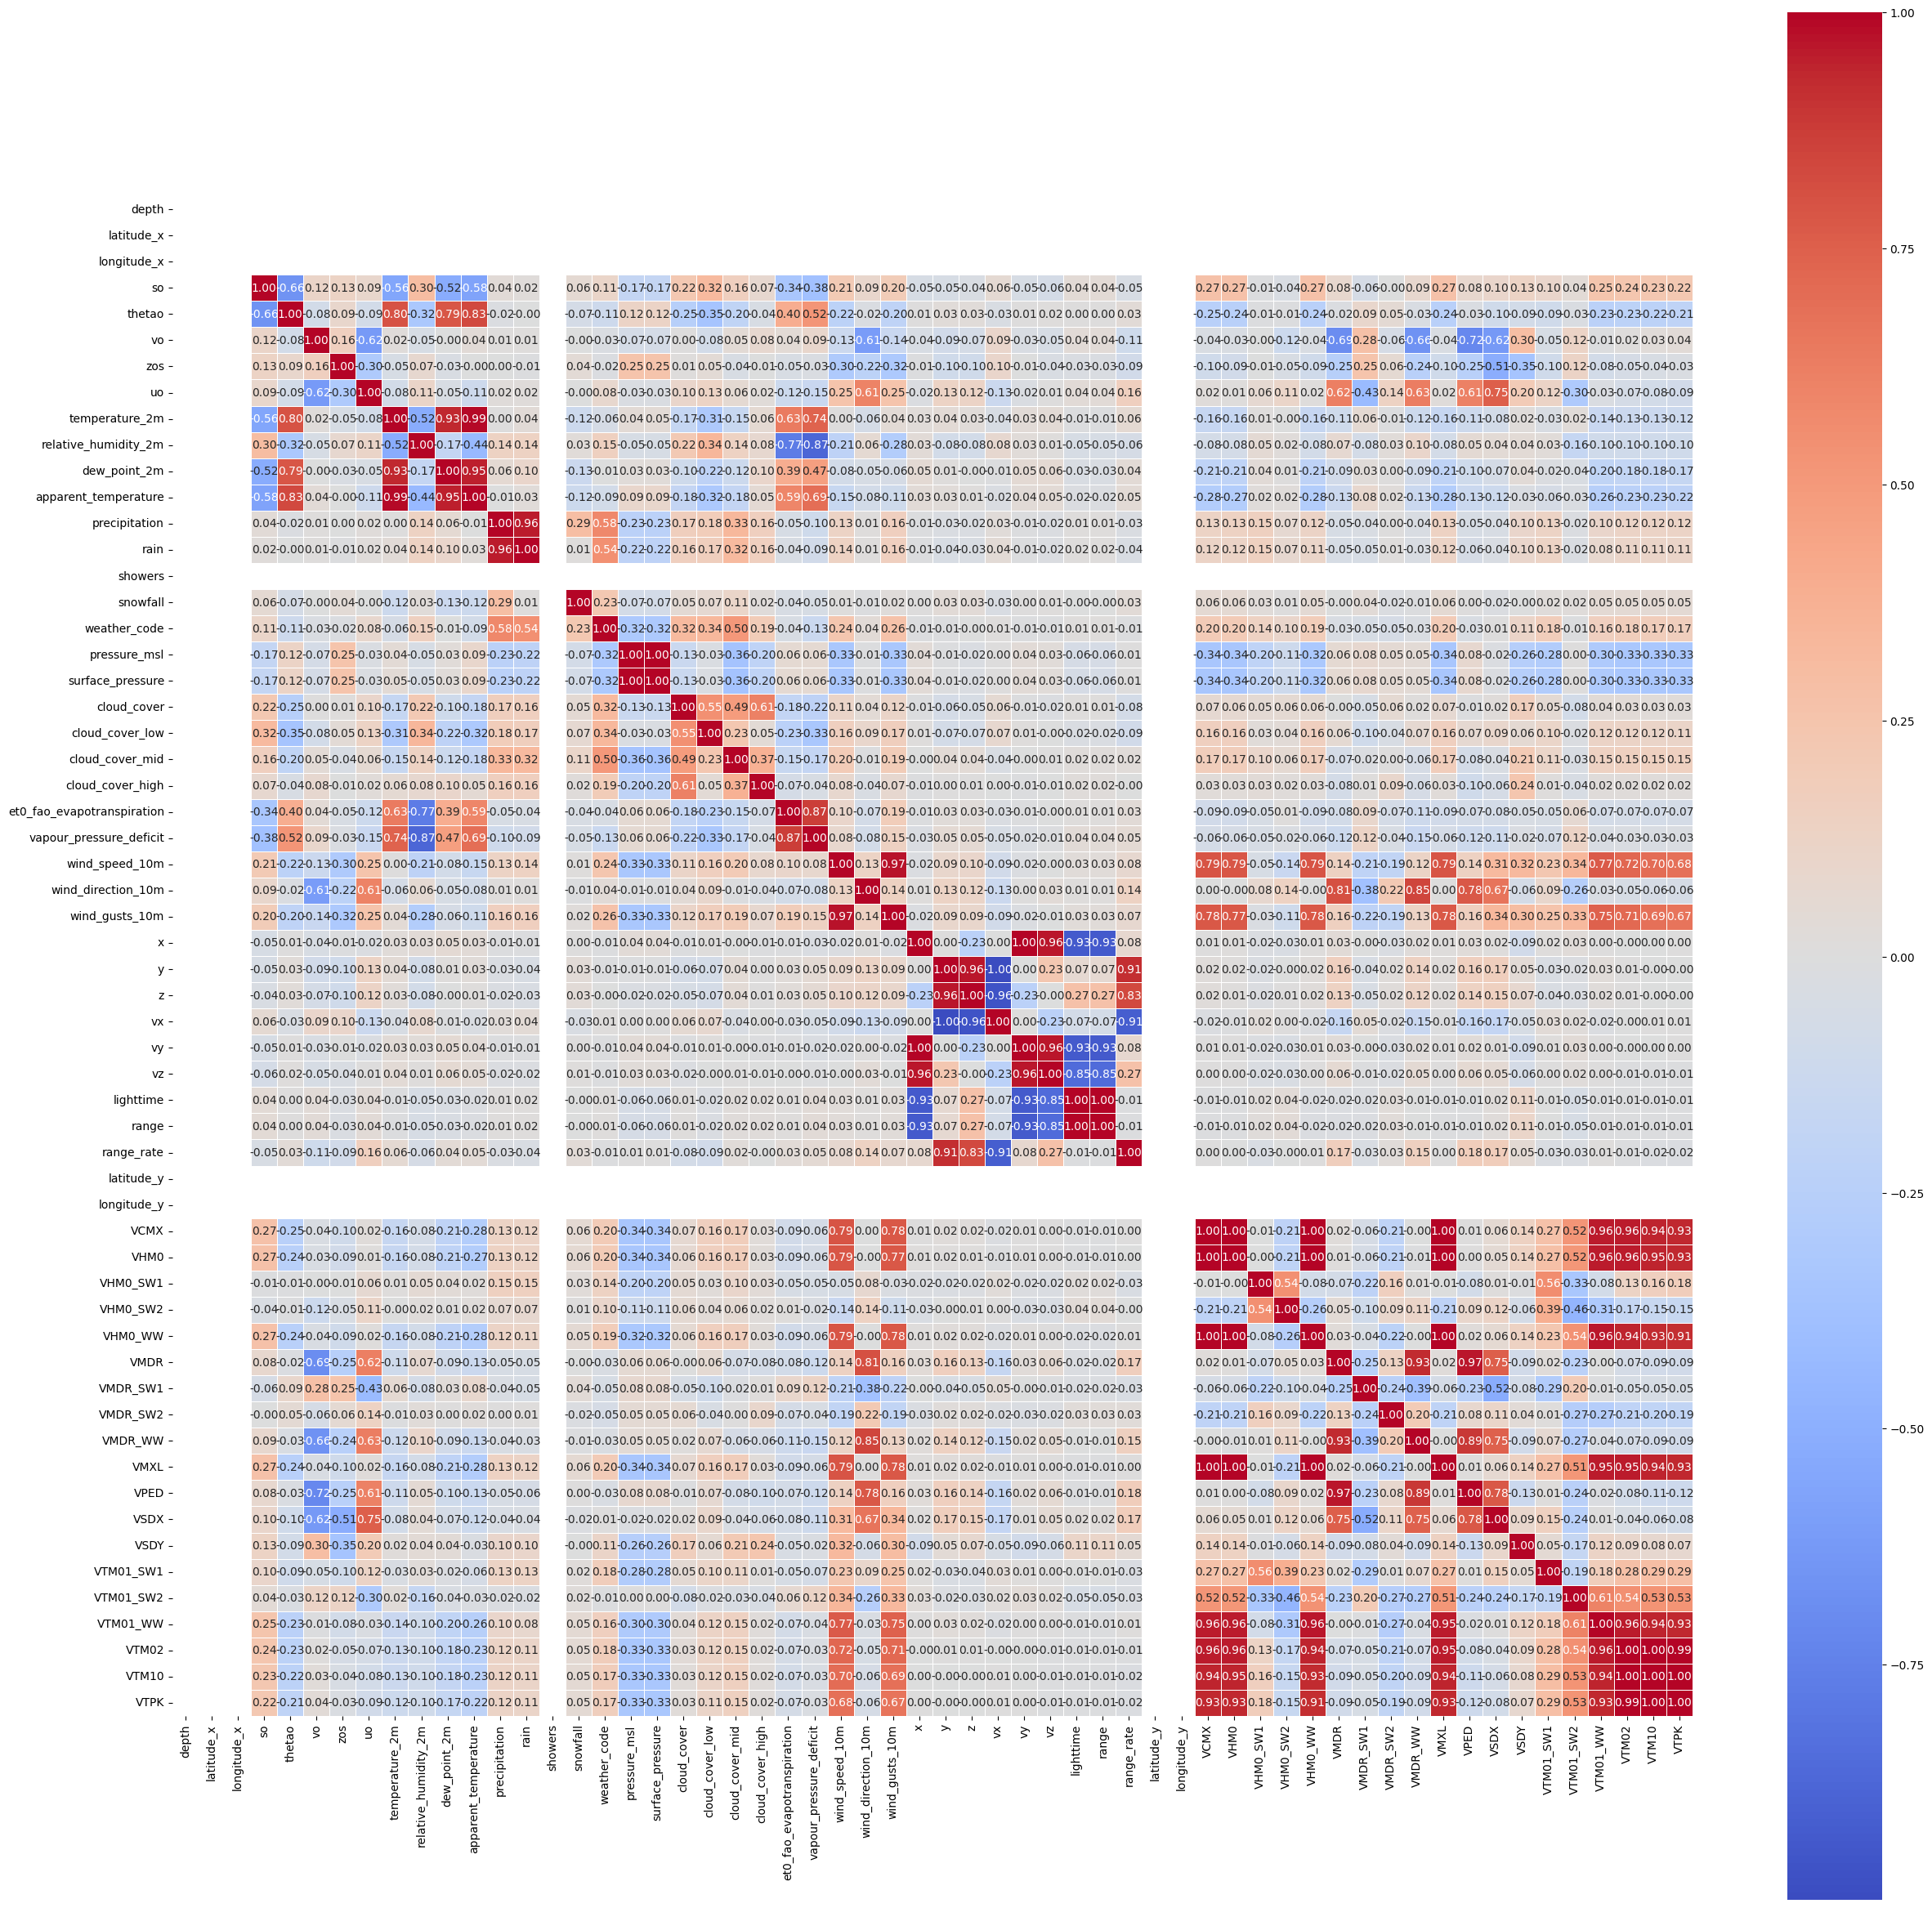

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot correlation
corr = df_merged.corr(numeric_only=True)

plt.figure(figsize=(30, 30))

# pallette = sns.diverging_palette(220, 20, n=7)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=.5)
plt.show()



In [39]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_plot = df_merged.groupby("time").mean(numeric_only=True).reset_index()



# Subplots erstellen (2 Zeilen, 1 Spalte)
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    subplot_titles=["Sea Surface Salinity (zos)", "Sea Surface Temperature (thetao)"])

# Erster Plot (zos)
fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["zos"],
    name="Sea Surface height (zos)"
), row=1, col=1)

# Erster Plot (zos)
fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["VCMX"],
    name="Wave heigth (VCMX)"
), row=1, col=1)

# Zweiter Plot (thetao)
fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["thetao"],
    name="Temperature (thetao)"
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["x"],
    name="x"
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["y"],
    name="y"
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_plot["time"],
    y=df_plot["z"],
    name="z"
), row=3, col=1)

# Layout anpassen
fig.update_layout(
    title="Visualisation",
    xaxis_title="Time",
    height=600  # Größe anpassen
)

# Anzeigen
fig.show()



In [8]:
df = df_merged.drop(columns=["time"])

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np

# # Dummy DataFrame (ersetzen mit echtem Datensatz)
features = ['depth', 'latitude', 'longitude', 'so', 'thetao', 'vo', 'uo', 'temperature_2m', 
            'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation_probability',
            'precipitation', 'rain', 'showers', 'snowfall', 'snow_depth', 'weather_code',
            'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 
            'cloud_cover_high', 'visibility', 'evapotranspiration', 'et0_fao_evapotranspiration', 
            'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_80m', 'wind_speed_120m', 'wind_speed_180m',
            'wind_direction_10m', 'wind_direction_80m', 'wind_direction_120m', 'wind_direction_180m', 
            'wind_gusts_10m', 'temperature_80m', 'temperature_120m', 'temperature_180m', 'soil_temperature_0cm',
            'soil_temperature_6cm', 'soil_temperature_18cm', 'soil_temperature_54cm', 'soil_moisture_0_to_1cm',
            'soil_moisture_1_to_3cm', 'soil_moisture_3_to_9cm', 'soil_moisture_9_to_27cm', 'soil_moisture_27_to_81cm']

# df = pd.DataFrame(np.random.rand(10000, len(features) + 1), columns=features + ['zos'])

# Daten vorbereiten
X = torch.tensor(df[features].values, dtype=torch.float32)
y = torch.tensor(df['zos'].values, dtype=torch.float32).view(-1, 1)

# Train-Test Split
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Neuronales Netzwerk definieren
class ZOSPredictor(nn.Module):
    def __init__(self, input_dim):
        super(ZOSPredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Modell initialisieren
model = ZOSPredictor(input_dim=len(features))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluierung
model.eval()
total_loss = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        total_loss += loss.item()

print(f"Test Loss: {total_loss/len(test_loader):.4f}")


KeyError: "['precipitation_probability', 'snow_depth', 'visibility', 'evapotranspiration', 'wind_speed_80m', 'wind_speed_120m', 'wind_speed_180m', 'wind_direction_80m', 'wind_direction_120m', 'wind_direction_180m', 'temperature_80m', 'temperature_120m', 'temperature_180m', 'soil_temperature_0cm', 'soil_temperature_6cm', 'soil_temperature_18cm', 'soil_temperature_54cm', 'soil_moisture_0_to_1cm', 'soil_moisture_1_to_3cm', 'soil_moisture_3_to_9cm', 'soil_moisture_9_to_27cm', 'soil_moisture_27_to_81cm'] not in index"

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Beispielaufruf:
plot_loss(train_losses, val_losses)


NameError: name 'train_losses' is not defined